In [7]:
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd
import numpy as np
import os

In [2]:
from align_db import load_emov_db

In [13]:
from align_db import path_emov_db

In [15]:
path_emov_db

'/data4/data/EmoV-DB/02_EmoV-DB-sr-22050'

In [3]:
data = load_emov_db('/data4/data/EmoV-DB/02_EmoV-DB-sr-22050', load_csv=True)

DB loaded from data_stat/02_EmoV-DB-sr-22050/emov_db.csv !


In [4]:
cnt = 1
for spk in data.speaker.unique():
    emotions = data[data.speaker == spk].emotion.unique()
    for emo in emotions:
        print("[{:2d}] ({}, {})".format(cnt, spk, emo))
        cnt += 1

[ 1] (bea, amused)
[ 2] (bea, angry)
[ 3] (bea, disgusted)
[ 4] (bea, neutral)
[ 5] (bea, sleepy)
[ 6] (jenie, amused)
[ 7] (jenie, angry)
[ 8] (jenie, disgusted)
[ 9] (jenie, neutral)
[10] (jenie, sleepy)
[11] (josh, amused)
[12] (josh, neutral)
[13] (josh, sleepy)
[14] (sam, amused)
[15] (sam, angry)
[16] (sam, disgusted)
[17] (sam, neutral)
[18] (sam, sleepy)


In [5]:
top_db=20

In [6]:
#ipd.display(ipd.Audio(y, rate=fs))
#ipd.display(ipd.Audio(yt, rate=fs))

Total waves shown: 331


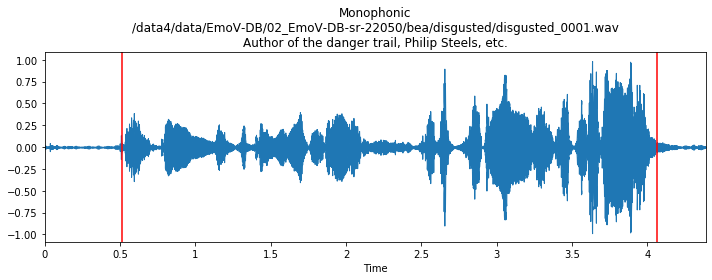

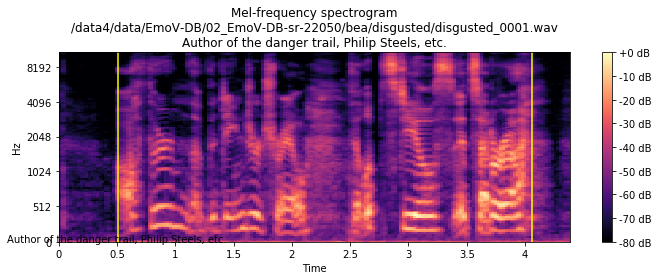

In [33]:
(spk, emo) = ('bea', 'disgusted')
data_selected = data[(data.speaker == spk) & (data.emotion == emo)]
print("Total waves shown: {}".format(data_selected.shape[0]))
for i, row in data_selected.iterrows():
    original_wav_path = os.path.join(path_emov_db, row.sentence_path)
    dir_path, full_file_name = os.path.split(original_wav_path)
    file_name, file_ext = os.path.splitext(full_file_name)
    y, fs = librosa.load(original_wav_path)
    yt, trim_index = librosa.effects.trim(y, top_db=top_db)
    
    sr = fs
    
    plt.figure(figsize=(10, 4))
    librosa.display.waveplot(y, sr=sr)
    plt.title('Monophonic\n{}\n{}'.format(original_wav_path, row.script))
    plt.tight_layout()
    plt.axvline(trim_index[0]/fs, color='red')
    plt.axvline(trim_index[1]/fs, color='red')
    wav_img_path = os.path.join(dir_path, "{}.{}".format(file_name, 'png'))
    plt.savefig(wav_img_path)
    #plt.show()
    
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,
                                         fmax=sr/2)
    plt.figure(figsize=(10, 4))
    S_dB = librosa.power_to_db(S, ref=np.max)

    librosa.display.specshow(S_dB, x_axis='time',
                             y_axis='mel', sr=sr,
                            fmax=sr/2)
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel-frequency spectrogram\n{}\n{}'.format(original_wav_path, row.script))
    plt.text(.5, -5, row.script, ha='center')
    plt.tight_layout()
    plt.axvline(trim_index[0]/fs, color='yellow')
    plt.axvline(trim_index[1]/fs, color='yellow')
    mel_img_path = os.path.join(dir_path, "{}_mel.{}".format(file_name, 'png'))
    plt.savefig(mel_img_path)
    #plt.show()
    
    txt_file_name = '{}.txt'.format(file_name)
    txt_path = os.path.join(dir_path, txt_file_name)
    with open(txt_path, 'w') as f:
        f.write(row.script)
    break

In [17]:
mel_img_path

'/data4/data/EmoV-DB/02_EmoV-DB-sr-22050/bea/disgusted/disgusted_0001_mel.png'

# 2. Only one file

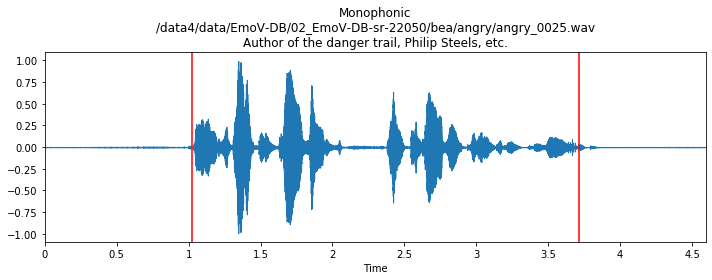

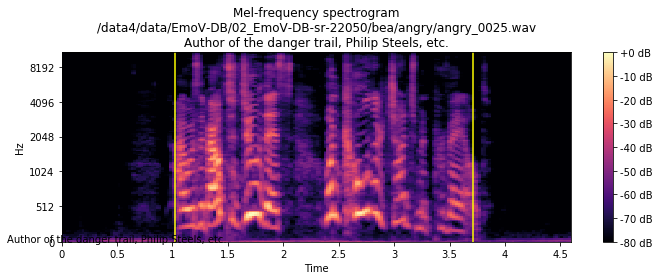

In [105]:
original_wav_path = '/data4/data/EmoV-DB/02_EmoV-DB-sr-22050/bea/angry/angry_0025.wav'

dir_path, full_file_name = os.path.split(original_wav_path)
file_name, file_ext = os.path.splitext(full_file_name)
y, fs = librosa.load(original_wav_path)

top_db_start = 20
_, trim_index = librosa.effects.trim(y, top_db=top_db_start)
i_start = trim_index[0]
top_db_end = 30
_, trim_index = librosa.effects.trim(y, top_db=top_db_end)
i_end = trim_index[1]
yt = y[i_start:i_end]

sr = fs

plt.figure(figsize=(10, 4))
librosa.display.waveplot(y, sr=sr)
plt.title('Monophonic\n{}\n{}'.format(original_wav_path, row.script))
plt.tight_layout()
plt.axvline(trim_index[0]/fs, color='red')
plt.axvline(trim_index[1]/fs, color='red')
wav_img_path = os.path.join(dir_path, "{}.{}".format(file_name, 'png'))
#plt.savefig(wav_img_path)
plt.show()

S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,
                                     fmax=sr/2)
plt.figure(figsize=(10, 4))
S_dB = librosa.power_to_db(S, ref=np.max)

librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr,
                        fmax=sr/2)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram\n{}\n{}'.format(original_wav_path, row.script))
plt.text(.5, -5, row.script, ha='center')
plt.tight_layout()
plt.axvline(trim_index[0]/fs, color='yellow')
plt.axvline(trim_index[1]/fs, color='yellow')
mel_img_path = os.path.join(dir_path, "{}_mel.{}".format(file_name, 'png'))
#plt.savefig(mel_img_path)
plt.show()

'''txt_file_name = '{}.txt'.format(file_name)
txt_path = os.path.join(dir_path, txt_file_name)
with open(txt_path, 'w') as f:
    f.write(row.script)'''
    
ipd.display(ipd.Audio(y, rate=fs))
ipd.display(ipd.Audio(yt, rate=fs))

In [107]:
y.max()

0.99328613

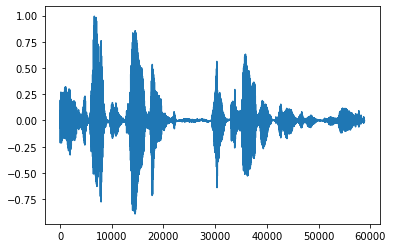

In [132]:
plt.plot(yt)

In [133]:
len(yt) / sr

2.670294784580499

In [127]:
window_frame_len =  int(0.5 * sr)

In [134]:
n_steps = int(len(yt) - window_frame_len)
starting_step = int(window_frame_len // 2)

In [143]:
mean_list = list()
for i in range(n_steps):
    window_frames = yt[i:i+window_frame_len]
    window_frames = np.abs(window_frames)
    mean_list.append((i, window_frames.mean()))

In [144]:
len(mean_list)

47855

In [151]:
import pandas as pd
df = pd.DataFrame.from_records(mean_list, columns =['time_index', 'mean_val']) 
df = df.sort_values(by=['mean_val']).reset_index()

In [156]:
df[:100]['mean_val'].tolist()

[0.01468366663902998,
 0.014686079695820808,
 0.014687815681099892,
 0.01469123363494873,
 0.014696394093334675,
 0.014702568762004375,
 0.014709347859025002,
 0.014713278971612453,
 0.014716201461851597,
 0.014720317907631397,
 0.01472250185906887,
 0.014726280234754086,
 0.014728270471096039,
 0.014731403440237045,
 0.014731827192008495,
 0.014732425101101398,
 0.014733961783349514,
 0.014735184609889984,
 0.014738199301064014,
 0.0147404745221138,
 0.014741424471139908,
 0.014742501080036163,
 0.014742592349648476,
 0.01474398747086525,
 0.014746511355042458,
 0.01474741380661726,
 0.014747749082744122,
 0.014747959561645985,
 0.01474984735250473,
 0.01475082989782095,
 0.014750951901078224,
 0.014756233431398869,
 0.014756612479686737,
 0.01475747860968113,
 0.014757622964680195,
 0.014759574085474014,
 0.014760858379304409,
 0.0147628178820014,
 0.014762939885258675,
 0.01476313080638647,
 0.014763418585062027,
 0.014765160158276558,
 0.014765419997274876,
 0.014769879169762135,
 

# 3. VAD trimmer

In [2]:
from trimmer import get_vad_ranges
from align_db import load_emov_db_postprocessed
import librosa
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd

In [3]:
data = load_emov_db_postprocessed()
def get_fa_trim_range(speaker, emotion, cmu_a_id):
    df = data[(data.speaker == speaker) & (data.emotion == emotion) & (data.cmu_a_id == cmu_a_id)]
    print(len(df))
    fa_trim_start = df.iloc[0].fa_trim_start
    fa_trim_end = df.iloc[0].fa_trim_end
    
    return fa_trim_start, fa_trim_end

In [4]:
speaker = 'jenie'
emotion = 'neutral'
cmu_a_id = 432
wav_path = '/data4/data/EmoV-DB/02_EmoV-DB-sr-16000/{}/{}/{}_{:04d}.wav'.format(speaker, emotion, emotion, cmu_a_id)
#trimmed_wav_path = '/data4/data/EmoV-DB/03_EmoV-DB-vad-trim/{}/{}/{}_{:04d}.wav'.format(speaker, emotion, emotion, cmu_a_id)
frame_duration_ms=30
padding_duration_ms=300

In [5]:
fa_trim_start, fa_trim_end = get_fa_trim_range(speaker, emotion, cmu_a_id)
print(fa_trim_start, fa_trim_end)

1
1.37 3.29


In [6]:
time_start, time_end, time_start_list, time_end_list = get_vad_ranges(wav_path, frame_duration_ms, padding_duration_ms)
print(time_start_list)
print(time_end_list)

[0.57, 1.47]
[0.72, 3.3]


In [7]:
y, sr = librosa.load(wav_path, sr=16000)

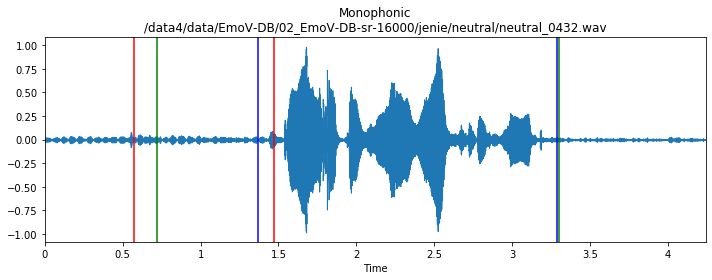

In [8]:
plt.figure(figsize=(10, 4))
librosa.display.waveplot(y, sr=sr)
plt.title('Monophonic\n{}'.format(wav_path))
plt.tight_layout()

plt.axvline(fa_trim_start, color='blue')
plt.axvline(fa_trim_end, color='blue')

for i in range(len(time_start_list)):
    time_start = time_start_list[i]
    plt.axvline(time_start, color='red')
    
for i in range(len(time_end_list)):
    time_end = time_end_list[i]
    plt.axvline(time_end, color='green')

In [447]:
len(time_start_list)


2

In [448]:
len(time_end_list)

1

In [431]:
# original
ipd.display(ipd.Audio(y, rate=sr))

In [432]:
# fa trim
ipd.display(ipd.Audio(y[int(fa_trim_start*sr):int(fa_trim_end*sr)], rate=sr))
print(fa_trim_start, fa_trim_end)

2.24 7.21


In [433]:
# vad trim
vad_trim_start = time_start_list[0]
vad_trim_end = time_end_list[-1]
ipd.display(ipd.Audio(y[int(vad_trim_start*sr):int(vad_trim_end*sr)], rate=sr))
print(vad_trim_start, vad_trim_end)

0.87 1.65


In [434]:
for i in range(len(time_start_list)):
    time_start = time_start_list[i]
    time_index_start = int(time_start * sr)
    if (len(time_start_list) - len(time_end_list) == 1) and (i == len(time_start_list) - 1):
        time_end = len(y) * sr 
        time_index_end = len(y)
    else:
        time_end = time_end_list[i]
        time_index_end = int(time_end * sr)
    print("From {} sec to {} sec".format(time_start, time_end))
    ipd.display(ipd.Audio(y[time_index_start:time_index_end], rate=sr))

From 0.87 sec to 1.65 sec


From 1.77 sec to 1921200000 sec


In [147]:
import pandas as pd
path = '/data4/data/EmoV-DB/02_EmoV-DB-sr-22050/emov_db_postprocessed.xlsx'
df = pd.read_excel(path)
speaker = 'bea'
emotion = 'amused'
script_id = 4
df = df[(df.speaker == speaker) & (df.emotion == emotion) & (df.cmu_a_id == script_id)]
df.iloc[0].trim_start
df.iloc[0].trim_end

3.55

In [52]:
import numpy as np
np.sum(np.asarray([1,2,3]) >= 2)

2